In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import statsmodels.api as sm
# import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
# from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv("csv/train.csv",  encoding='latin-1')

# Leer datos de un csv
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Extraemos las columnas SalePrice y GrLivArea

C:\Users\josue\AppData\Local\Temp\ipykernel_43744\2427296070.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=selected_columns["GrLivArea"], y=selected_columns["SalePrice"], palette="viridis")


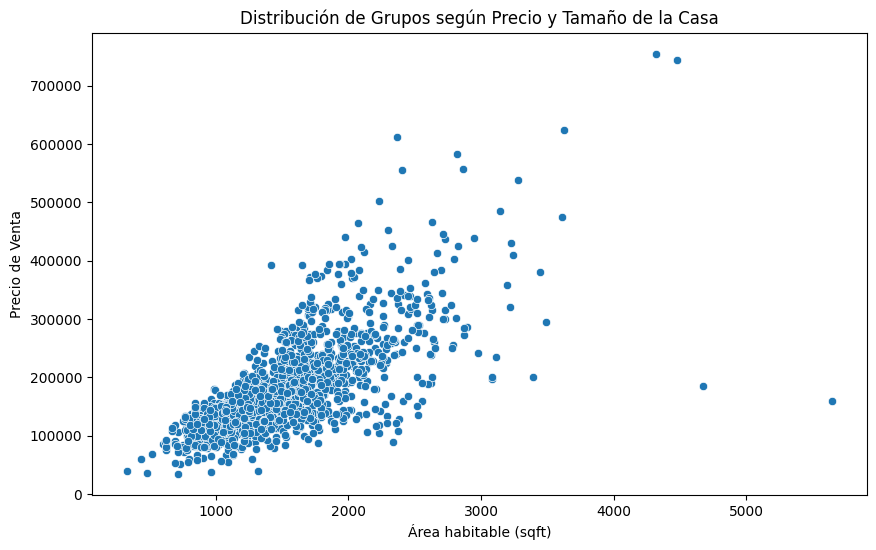

In [35]:
selected_columns = train_data[["SalePrice", "GrLivArea", "OverallQual"]]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=selected_columns["GrLivArea"], y=selected_columns["SalePrice"], palette="viridis")
plt.title("Distribución de Grupos según Precio y Tamaño de la Casa")
plt.xlabel("Área habitable (sqft)")
plt.ylabel("Precio de Venta")
plt.show()

## Separando Train y test

In [36]:
X = selected_columns[["OverallQual", "GrLivArea"]]  # Mantiene ambas columnas
y = selected_columns["SalePrice"]  # La variable objetivo


### Elegiremos 70% de entrenamiento y 30% de prueba

In [37]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train)
print(X_test)

      OverallQual  GrLivArea
1085            6        996
226             7       2520
255             7       2291
843             5       1800
180             6       1525
...           ...        ...
1130            4       1981
303             5        894
1455            6       1647
893             5       1383
1144            4        924

[1021 rows x 2 columns]
      OverallQual  GrLivArea
905             5       1063
876             4       1040
282             7       1314
820             7       1640
656             5       1053
...           ...        ...
1044            8       2524
926             8       2374
1226            6       1933
371             4       1588
1292            5       2372

[438 rows x 2 columns]


# Realizando un modelo univaraible con GrLivArea (7)

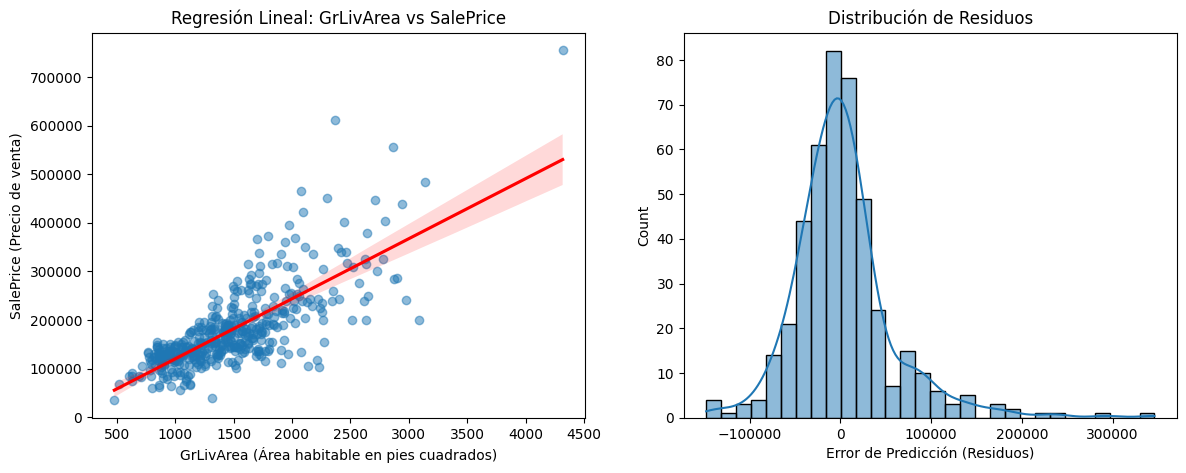

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.475
 Model:                            OLS   Adj. R-squared:                  0.475
 Method:                 Least Squares   F-statistic:                     923.0
 Date:                Fri, 28 Feb 2025   Prob (F-statistic):          6.60e-145
 Time:                        21:06:56   Log-Likelihood:                -12628.
 No. Observations:                1022   AIC:                         2.526e+04
 Df Residuals:                    1020   BIC:                         2.527e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [39]:
# Seleccionamos una variable predictora (GrLivArea) y la variable objetivo (SalePrice)
X = selected_columns[["GrLivArea"]]
y = selected_columns["SalePrice"]

# Dividimos los datos en entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)


# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resumen del modelo con statsmodels
X_train_sm = sm.add_constant(X_train)  # Agregar constante para la intersección
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Graficar regresión lineal y residuos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersión con la línea de regresión
sns.regplot(x=X_test, y=y_test, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title("Regresión Lineal: GrLivArea vs SalePrice")
axes[0].set_xlabel("GrLivArea (Área habitable en pies cuadrados)")
axes[0].set_ylabel("SalePrice (Precio de venta)")

# Gráfico de residuos
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Residuos")
axes[1].set_xlabel("Error de Predicción (Residuos)")

plt.show()

# Mostrar resumen del modelo
model_sm.summary(), mse, r2
